In [ ]:
# Importar librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

Attribute Information:

mpg: continuous
cylinders: multi-valued discrete
displacement: continuous
horsepower: continuous
weight: continuous
acceleration: continuous
model year: multi-valued discrete
origin: multi-valued discrete
car name: string (unique for each instance)

In [40]:
df = pd.read_csv('cluster_mpg.csv')

In [41]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [42]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [43]:
df.isnull().sum()       

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
df['origin'].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

In [44]:
#Asigno un valor a la variable categórica
df_w_dummies = pd.get_dummies(df.drop('name', axis=1))*1

In [10]:
df_w_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [45]:
df_w_dummies.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_europe', 'origin_japan',
       'origin_usa'],
      dtype='object')

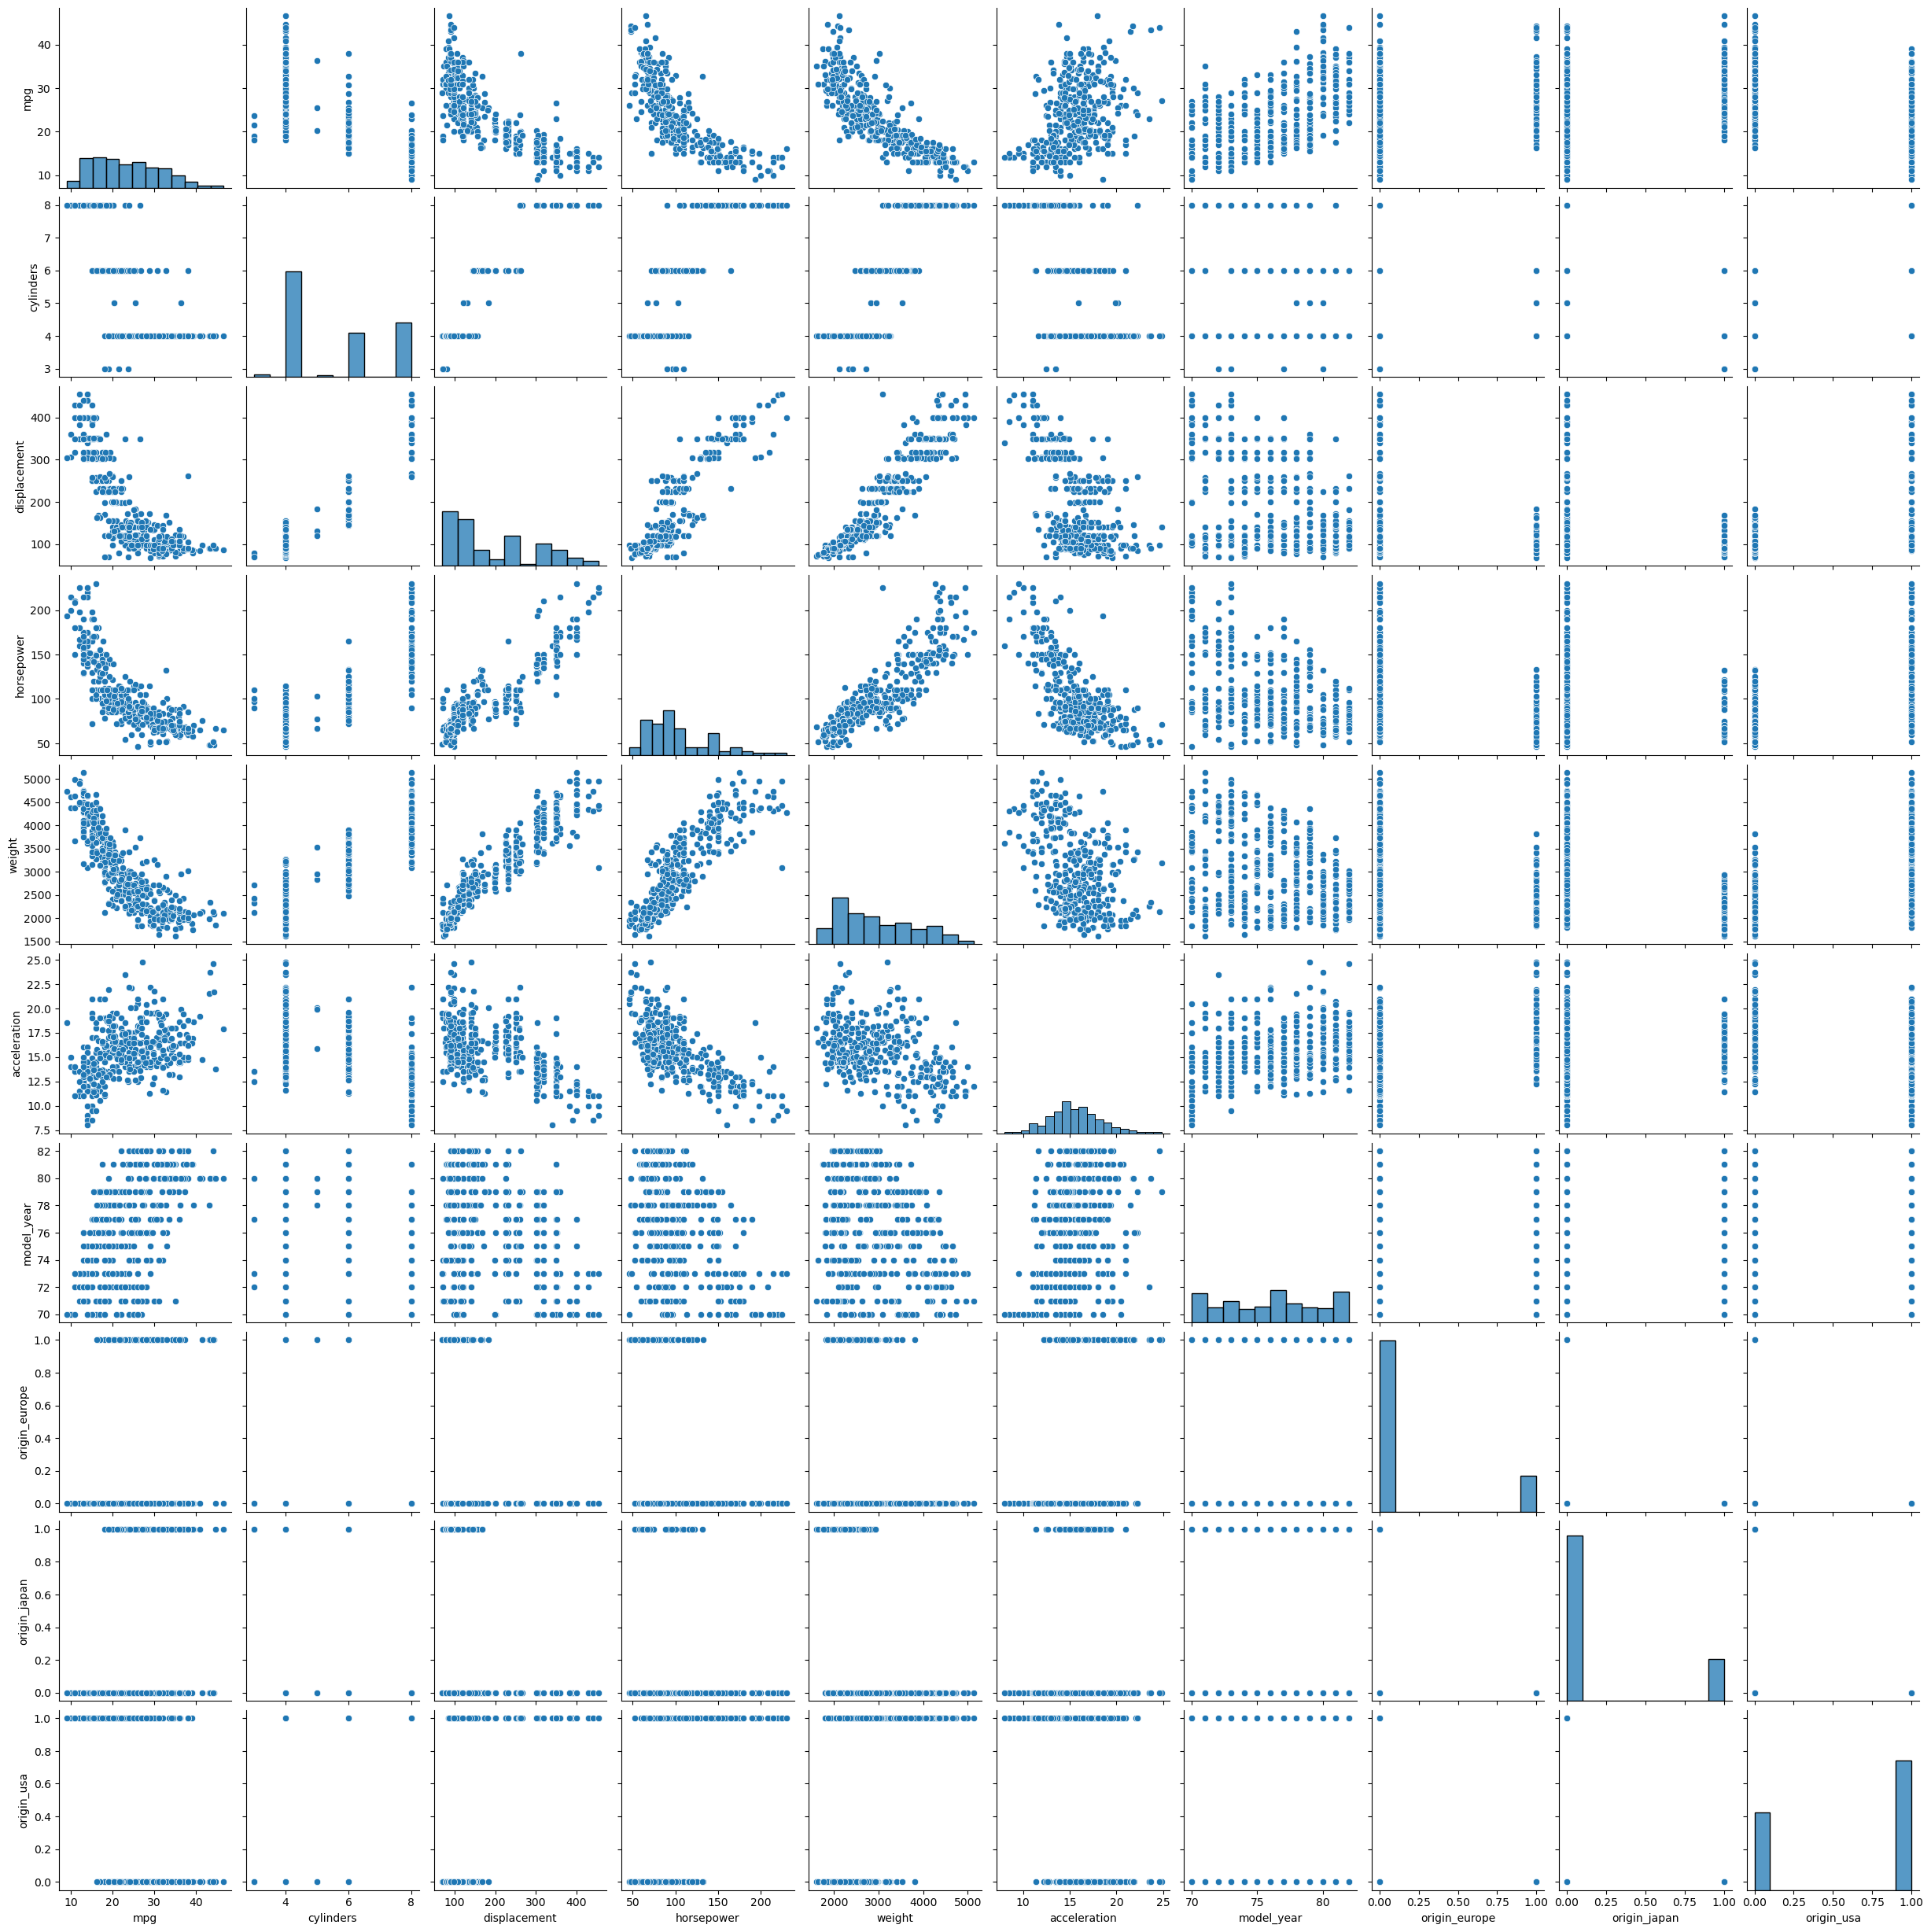

In [12]:
sns.pairplot(df_w_dummies)
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
scaled_data = scaler.fit_transform(df_w_dummies) #para escalar los datos entre 0 y 1

In [49]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [50]:
scaled_df = pd.DataFrame(scaled_data,columns = df_w_dummies.columns)

In [51]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<Axes: >

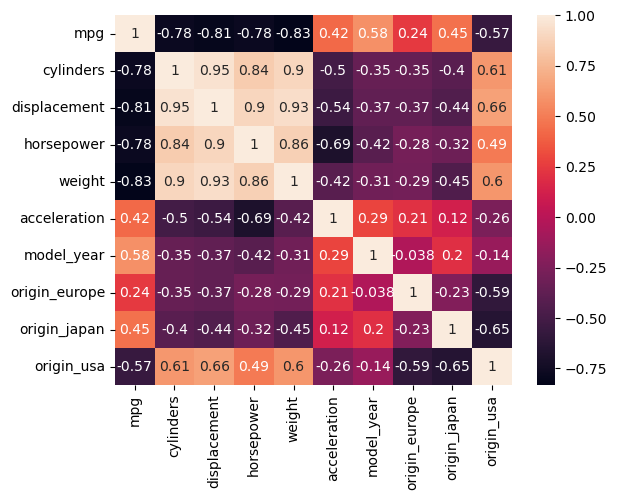

In [52]:
sns.heatmap(scaled_df.corr(), annot=True)
#displacement vs cylinders 0.95
#displacement vs weight    0.93

vamos el peso con las demás variables:

Text(0.5, 1.0, 'weight vs acceleration')

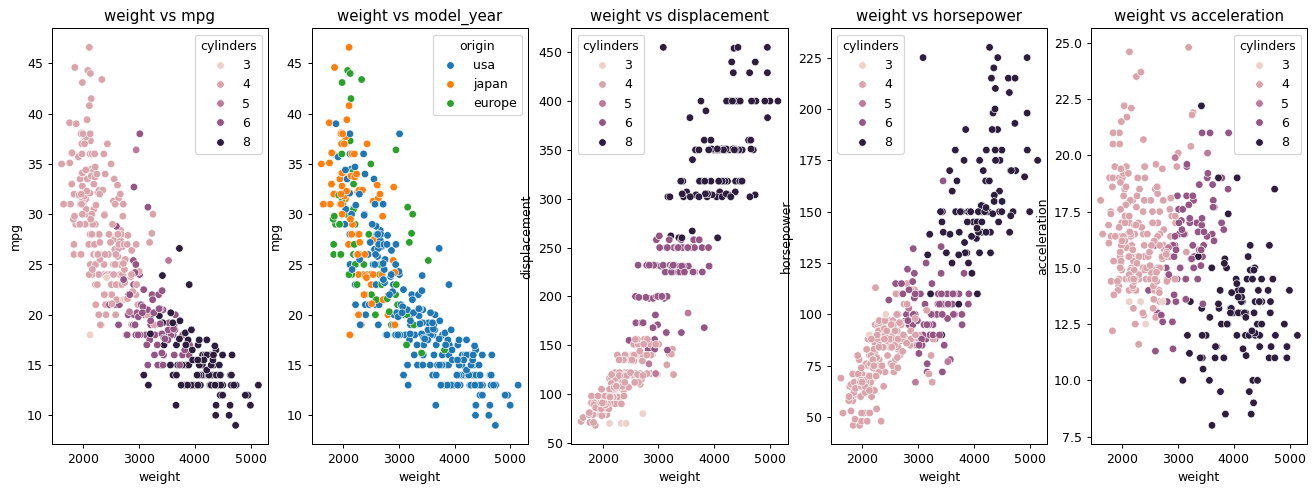

In [24]:
fig, axes = plt.subplots(figsize = (18,6), nrows = 1, ncols = 5, dpi = 90)

sns.scatterplot(x = "weight", y="mpg", data=df, hue = "cylinders", ax = axes[0])
axes[0].set_title("weight vs mpg")

sns.scatterplot(x = "weight", y="mpg", data=df, hue = "origin", ax = axes[1])
axes[1].set_title("weight vs model_year")

sns.scatterplot(x = "weight", y="displacement", data=df, hue = "cylinders", ax = axes[2])
axes[2].set_title("weight vs displacement")

sns.scatterplot(x = "weight", y="horsepower", data=df, hue = "cylinders", ax = axes[3])
axes[3].set_title("weight vs horsepower")

sns.scatterplot(x = "weight", y="acceleration", data=df, hue = "cylinders", ax = axes[4])
axes[4].set_title("weight vs acceleration")


In [26]:
k=5
model_cluster = KMeans(n_clusters = k, random_state = 42)   #Creando mi modelo de KMeans   -> agrupar en 4 clusters

In [27]:
cluster_label = model_cluster.fit_predict(scaled_df)  #Obtengo el vector con los datos
final_label = pd.Series(cluster_label)   #Paso el vector a tabla

C:\Users\Jose_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [53]:
cluster_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 2, 2, 2,
       2, 2, 4, 0, 0, 0, 0, 3, 1, 3, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0,
       4, 1, 4, 4, 1, 2, 2, 2, 3, 3, 2, 1, 3, 1, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2, 1, 3, 3, 1, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 2, 0, 0, 0, 0, 4, 3, 1, 3,
       3, 1, 4, 2, 0, 0, 2, 2, 2, 2, 0, 2, 3, 0, 4, 4, 4, 3, 1, 3, 1, 4,
       4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 4, 4, 4, 4,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 3, 1, 4, 1, 3, 2, 3, 4, 2, 4, 2,
       2, 2, 2, 3, 2, 2, 1, 1, 2, 0, 0, 0, 0, 4, 4, 4, 4, 1, 1, 2, 3, 4,
       4, 4, 4, 2, 3, 3, 1, 2, 0, 2, 3, 2, 0, 0, 0, 0, 3, 1, 2, 1, 3, 0,
       4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 2, 1, 3, 1, 1, 1, 3, 2, 3, 2, 3,
       2, 1, 3, 3, 3, 4, 0, 0, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 0, 4, 0, 0,
       1, 3, 3, 1, 3, 1, 1, 3, 2, 2, 2, 2, 2, 3, 4, 4, 1, 4, 4, 0, 0, 0,
       0, 0, 0, 4, 0, 2, 3, 1, 1, 2, 4, 2, 4, 1, 1,

In [54]:
final_label.value_counts()

0    96
3    79
4    76
1    73
2    68
Name: count, dtype: int64

In [30]:
df['Categoria'] = cluster_label

In [56]:
df_w_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [32]:
df["origin_num"]=pd.Categorical(df['origin']).codes
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Categoria,origin_num
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0,2
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0,2
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0,2
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0,2
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0,2


In [26]:
#df=df.drop(columns=['origin','name'])

In [33]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Categoria,origin_num
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0,2
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0,2
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0,2
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0,2
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0,2


In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
scaled_df['Categoria'] = cluster_label

scaled_df = pd.DataFrame(scaled_data,columns = cluster_label.columns)

In [ ]:
scaled_df.head()

C:\Users\Jose_\AppData\Local\Temp\ipykernel_18072\3081658739.py:1: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.scatterplot(data=df, x = 'cylinders', y = 'mpg',


<Axes: xlabel='cylinders', ylabel='mpg'>

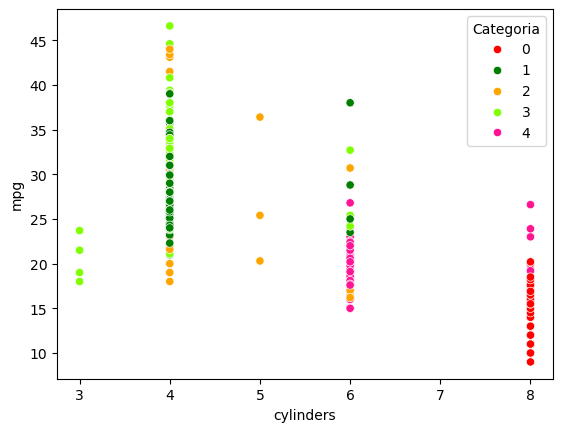

In [37]:
sns.scatterplot(data=df, x = 'cylinders', y = 'mpg', 
                hue = 'Categoria', palette = ['red', 'green', 'orange', 'chartreuse',
                                              'deeppink', 'darkgreen', 'darkorchid'])

In [ ]:
sns.pairplot(df, hue = "Categoria", palette = 
             ['red', 'green', 'orange', 'chartreuse','deeppink', 'darkgreen', 'darkorchid'])

In [ ]:
sns.heatmap(scaled_df.corr(), annot=True)

In [68]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 1.2.2.


In [ ]:
df_aux = df.drop(columns = ['origin','name'])
#datos = list(zip(df['displacement'],df['cylinders']))
inercia=[]
for i in range (1,15):
    modelo_kmeans_opt = KMeans(n_clusters = i)
    modelo_kmeans_opt.fit(df_aux)
    inercia.append(modelo_kmeans_opt.inertia_)
#displacement vs cylinders 0.95
#displacement vs weight    0.93

In [66]:
df_aux.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


Text(0, 0.5, 'Inercia')

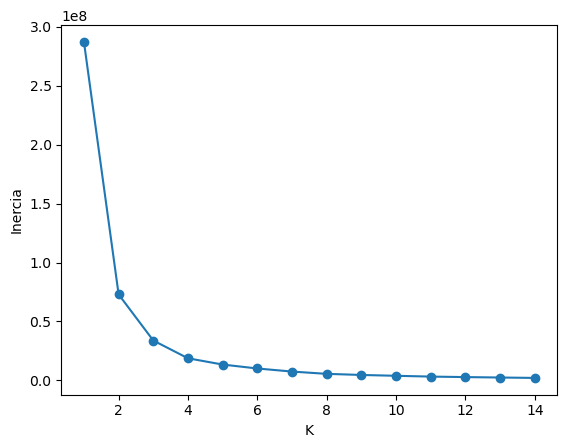

In [64]:
plt.plot(range(1,15),inercia, marker = 'o')
plt.xlabel('K')
plt.ylabel('Inercia')

In [ ]:
sns.scatterplot(data=df, x = 'horsepower', y = 'acceleration', hue = 'Categoria', palette = ['red', 'green', 'orange', 'brown'])
#displacement vs cylinders 0.95
#displacement vs weight    0.93

In [65]:
centers = model_cluster.cluster_centers_
print(centers)

[[ 1.46165780e-01  1.00000000e+00  7.26717270e-01  6.29189312e-01
   7.19662603e-01  2.75793651e-01  2.98611111e-01  2.22044605e-16
  -1.94289029e-16  1.00000000e+00]
 [ 5.06849315e-01  2.21917808e-01  1.55198046e-01  1.97141155e-01
   2.37001449e-01  4.96901500e-01  6.83789954e-01  1.11022302e-16
  -1.11022302e-16  1.00000000e+00]
 [ 4.94759074e-01  2.32352941e-01  1.07577139e-01  1.87819693e-01
   2.32625628e-01  5.23459384e-01  4.73039216e-01  1.00000000e+00
  -8.32667268e-17  0.00000000e+00]
 [ 5.70495556e-01  2.20253165e-01  8.96869787e-02  1.83888277e-01
   1.72449064e-01  4.86437613e-01  6.20253165e-01  1.11022302e-16
   1.00000000e+00  0.00000000e+00]
 [ 2.74496081e-01  6.36842105e-01  4.28294574e-01  2.95695080e-01
   4.71483145e-01  5.15664160e-01  4.68201754e-01  1.38777878e-16
  -1.11022302e-16  1.00000000e+00]]
